<a href="https://colab.research.google.com/github/mary-ts/Neural-Computing/blob/mary/FInal_CS4287_Assign2_19248547_19256434_19232845.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Xception architecture**

Start off by connecting to the Google Drive, since we are using Colab, we opted to store the dataset in a Google Drive for ease of access when calling for the flow from directory.....

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import all the modules needed for the code

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import keras.layers as layers
from keras import Sequential
import keras.models
from keras.layers import *
from keras.models import * 
from keras import optimizers, applications
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint, EarlyStopping

Set the train and test path and declare the epoch number and batch size

In [18]:
train_path = "/content/drive/MyDrive/CNN IMAGES/archive (1)/train/train"
test_path = "/content/drive/MyDrive/CNN IMAGES/archive (1)/test"

epochs = 10
batch_size = 64

Plot 9 random images from the test folder as a sample for data visualisation using the pyplot import

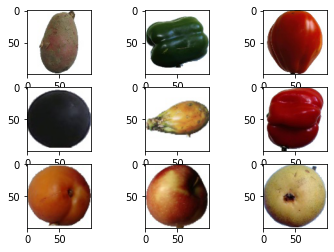

In [19]:
import os
from matplotlib import pyplot
from matplotlib.image import imread

img_dir="/content/drive/MyDrive/CNN IMAGES/archive (1)/test/test"
all_files=os.listdir(img_dir)
data_path = [os.path.join(img_dir + "/" + i) for i in all_files]
k=1
for i in data_path:
  plt.subplot(3,3,k) 
  k=k+1
  plt.imshow(imread(i))
  if k == 10:
    break

plt.show()

Building and Training the data


*   List item
*   List item



In [20]:
train_datagen = image.ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1,
    validation_split = 0.2
)

test_datagen= image.ImageDataGenerator(    
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1)

In [21]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (299,299),
    batch_size = 32,
    class_mode = 'categorical', 
    shuffle=True)

validation_generator = train_datagen.flow_from_directory(
    train_path,
    subset = 'validation',
    target_size = (299,299),
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (299,299),
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical')

Found 16855 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.
Found 5651 images belonging to 1 classes.


In [22]:
base_model = applications.Xception(weights='imagenet', 
                              include_top=False, 
                              input_shape=(299, 299, 3))

for layer in base_model.layers[:-5]:
    layer.trainable = False

model = keras.Sequential()
model.add(base_model)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation="relu"))
model.add(keras.layers.Dense(33, activation="softmax"))

input_shape = (None, 299, 299, 3)
model.build(input_shape)
model.compile(optimizers.RMSprop(learning_rate=0.0001, decay=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 flatten_1 (Flatten)         (None, 204800)            0         
                                                                 
 dense_2 (Dense)             (None, 1024)              209716224 
                                                                 
 dense_3 (Dense)             (None, 33)                33825     
                                                                 
Total params: 230,611,529
Trainable params: 212,916,769
Non-trainable params: 17,694,760
_________________________________________________________________


In [23]:
checkpoint = ModelCheckpoint("xception", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=7, verbose=2, mode='auto')
hist = model.fit(train_generator,  
                                    validation_data=validation_generator, 
                                    steps_per_epoch=32,
                                    validation_steps=10,                   
                                    epochs=epochs,
                                    callbacks = [checkpoint, early],
                                    verbose=1)

Epoch 1/10


 1/32 [..............................] - ETA: 11:34 - loss: 3.4941 - accuracy: 0.0625

 2/32 [>.............................] - ETA: 10:29 - loss: 4.2113 - accuracy: 0.0781

 3/32 [=>............................] - ETA: 8:48 - loss: 4.4192 - accuracy: 0.0729 

 4/32 [==>...........................] - ETA: 8:03 - loss: 4.5498 - accuracy: 0.0703

 5/32 [===>..........................] - ETA: 7:39 - loss: 4.3377 - accuracy: 0.0938

 6/32 [====>.........................] - ETA: 7:14 - loss: 4.1713 - accuracy: 0.1094

 7/32 [=====>........................] - ETA: 6:56 - loss: 4.0539 - accuracy: 0.1161

 8/32 [======>.......................] - ETA: 6:35 - loss: 3.8997 - accuracy: 0.1250

 9/32 [=======>......................] - ETA: 6:28 - loss: 3.8335 - accuracy: 0.1389

10/32 [========>.....................] - ETA: 6:08 - loss: 3.7435 - accuracy: 0.1531

11/32 [=========>....................] - ETA: 5:48 - loss: 3.6738 - accuracy: 0.1648

12/32 [==========>...................] - ETA: 5:29 - loss: 3.6073 - accuracy: 0.1667

13/32 [===========>..................] - ETA: 5:11 - loss: 3.5519 - accuracy: 0.1779

14/32 [============>.................] - ETA: 4:53 - loss: 3.4943 - accuracy: 0.1897

15/32 [=============>................] - ETA: 4:36 - loss: 3.4374 - accuracy: 0.1937

16/32 [==============>...............] - ETA: 4:18 - loss: 3.4053 - accuracy: 0.1953

17/32 [==============>...............] - ETA: 4:02 - loss: 3.3514 - accuracy: 0.2022

18/32 [===============>..............] - ETA: 3:45 - loss: 3.3103 - accuracy: 0.2083

19/32 [================>.............] - ETA: 3:28 - loss: 3.2750 - accuracy: 0.2138

20/32 [=================>............] - ETA: 3:15 - loss: 3.2183 - accuracy: 0.2219

21/32 [==================>...........] - ETA: 2:58 - loss: 3.1719 - accuracy: 0.2351

22/32 [===================>..........] - ETA: 2:41 - loss: 3.1300 - accuracy: 0.2386

23/32 [====================>.........] - ETA: 2:25 - loss: 3.0941 - accuracy: 0.2459

24/32 [=====================>........] - ETA: 2:11 - loss: 3.0710 - accuracy: 0.2487

25/32 [======================>.......] - ETA: 1:54 - loss: 3.0369 - accuracy: 0.2475

26/32 [=======================>......] - ETA: 1:38 - loss: 3.0190 - accuracy: 0.2512

27/32 [========================>.....] - ETA: 1:21 - loss: 2.9871 - accuracy: 0.2558

28/32 [=========================>....] - ETA: 1:05 - loss: 2.9649 - accuracy: 0.2612

29/32 [==========================>...] - ETA: 48s - loss: 2.9342 - accuracy: 0.2705 

30/32 [===========================>..] - ETA: 32s - loss: 2.9333 - accuracy: 0.2708

31/32 [============================>.] - ETA: 16s - loss: 2.9099 - accuracy: 0.2782

32/32 [==============================] - 650s 20s/step - loss: 2.9287 - accuracy: 0.2744 - val_loss: 7.8973 - val_accuracy: 0.2344
Epoch 2/10


 1/32 [..............................] - ETA: 8:25 - loss: 2.0698 - accuracy: 0.2812

 2/32 [>.............................] - ETA: 7:51 - loss: 1.9519 - accuracy: 0.3594

 3/32 [=>............................] - ETA: 7:32 - loss: 1.9857 - accuracy: 0.3854

 4/32 [==>...........................] - ETA: 7:16 - loss: 2.0419 - accuracy: 0.3828

 5/32 [===>..........................] - ETA: 6:59 - loss: 2.1422 - accuracy: 0.3625

 6/32 [====>.........................] - ETA: 6:44 - loss: 2.0334 - accuracy: 0.3906

 7/32 [=====>........................] - ETA: 6:27 - loss: 2.0165 - accuracy: 0.4018

 8/32 [======>.......................] - ETA: 6:11 - loss: 2.0265 - accuracy: 0.4062

 9/32 [=======>......................] - ETA: 5:56 - loss: 2.0062 - accuracy: 0.4375

10/32 [========>.....................] - ETA: 5:40 - loss: 1.9792 - accuracy: 0.4344

11/32 [=========>....................] - ETA: 5:25 - loss: 1.9682 - accuracy: 0.4318

12/32 [==========>...................] - ETA: 5:09 - loss: 1.9496 - accuracy: 0.4297

13/32 [===========>..................] - ETA: 4:54 - loss: 1.9325 - accuracy: 0.4423

14/32 [============>.................] - ETA: 4:38 - loss: 1.9421 - accuracy: 0.4420

15/32 [=============>................] - ETA: 4:28 - loss: 1.9524 - accuracy: 0.4458

16/32 [==============>...............] - ETA: 4:12 - loss: 1.9407 - accuracy: 0.4434

17/32 [==============>...............] - ETA: 3:56 - loss: 1.9315 - accuracy: 0.4504

18/32 [===============>..............] - ETA: 3:39 - loss: 1.9127 - accuracy: 0.4549

19/32 [================>.............] - ETA: 3:23 - loss: 1.8990 - accuracy: 0.4507

20/32 [=================>............] - ETA: 3:12 - loss: 1.8927 - accuracy: 0.4453

21/32 [==================>...........] - ETA: 2:56 - loss: 1.8984 - accuracy: 0.4435

22/32 [===================>..........] - ETA: 2:40 - loss: 1.8813 - accuracy: 0.4474

23/32 [====================>.........] - ETA: 2:24 - loss: 1.8544 - accuracy: 0.4538

24/32 [=====================>........] - ETA: 2:07 - loss: 1.8371 - accuracy: 0.4583

25/32 [======================>.......] - ETA: 1:51 - loss: 1.8184 - accuracy: 0.4650

26/32 [=======================>......] - ETA: 1:35 - loss: 1.8084 - accuracy: 0.4663

27/32 [========================>.....] - ETA: 1:19 - loss: 1.7933 - accuracy: 0.4711

28/32 [=========================>....] - ETA: 1:03 - loss: 1.7921 - accuracy: 0.4721

29/32 [==========================>...] - ETA: 47s - loss: 1.7944 - accuracy: 0.4698 

30/32 [===========================>..] - ETA: 31s - loss: 1.7838 - accuracy: 0.4740

31/32 [============================>.] - ETA: 15s - loss: 1.7790 - accuracy: 0.4738

32/32 [==============================] - 632s 20s/step - loss: 1.7571 - accuracy: 0.4824 - val_loss: 5.5161 - val_accuracy: 0.2875
Epoch 3/10


 1/32 [..............................] - ETA: 8:16 - loss: 1.7041 - accuracy: 0.4375

 2/32 [>.............................] - ETA: 7:37 - loss: 1.5813 - accuracy: 0.5000

 3/32 [=>............................] - ETA: 7:20 - loss: 1.5181 - accuracy: 0.5417

 4/32 [==>...........................] - ETA: 7:06 - loss: 1.4408 - accuracy: 0.5547

 5/32 [===>..........................] - ETA: 6:50 - loss: 1.4690 - accuracy: 0.5312

 6/32 [====>.........................] - ETA: 6:35 - loss: 1.5042 - accuracy: 0.5156

 7/32 [=====>........................] - ETA: 6:20 - loss: 1.4634 - accuracy: 0.5357

 8/32 [======>.......................] - ETA: 6:06 - loss: 1.4431 - accuracy: 0.5391

 9/32 [=======>......................] - ETA: 5:51 - loss: 1.4744 - accuracy: 0.5347

10/32 [========>.....................] - ETA: 5:36 - loss: 1.4707 - accuracy: 0.5375

11/32 [=========>....................] - ETA: 5:21 - loss: 1.4565 - accuracy: 0.5455

12/32 [==========>...................] - ETA: 5:05 - loss: 1.4086 - accuracy: 0.5573

13/32 [===========>..................] - ETA: 4:57 - loss: 1.3930 - accuracy: 0.5649

14/32 [============>.................] - ETA: 4:41 - loss: 1.3910 - accuracy: 0.5603

15/32 [=============>................] - ETA: 4:25 - loss: 1.3572 - accuracy: 0.5750

16/32 [==============>...............] - ETA: 4:09 - loss: 1.3681 - accuracy: 0.5742

17/32 [==============>...............] - ETA: 3:53 - loss: 1.3489 - accuracy: 0.5790

18/32 [===============>..............] - ETA: 3:38 - loss: 1.3381 - accuracy: 0.5764

19/32 [================>.............] - ETA: 3:27 - loss: 1.3532 - accuracy: 0.5757

20/32 [=================>............] - ETA: 3:11 - loss: 1.3514 - accuracy: 0.5703

21/32 [==================>...........] - ETA: 2:54 - loss: 1.3230 - accuracy: 0.5774

22/32 [===================>..........] - ETA: 2:38 - loss: 1.3016 - accuracy: 0.5881

23/32 [====================>.........] - ETA: 2:22 - loss: 1.2977 - accuracy: 0.5897

24/32 [=====================>........] - ETA: 2:06 - loss: 1.2719 - accuracy: 0.5964

25/32 [======================>.......] - ETA: 1:50 - loss: 1.2619 - accuracy: 0.6012

26/32 [=======================>......] - ETA: 1:34 - loss: 1.2741 - accuracy: 0.6046

27/32 [========================>.....] - ETA: 1:18 - loss: 1.2592 - accuracy: 0.6065

28/32 [=========================>....] - ETA: 1:03 - loss: 1.2647 - accuracy: 0.6071

29/32 [==========================>...] - ETA: 47s - loss: 1.2563 - accuracy: 0.6078 

30/32 [===========================>..] - ETA: 31s - loss: 1.2506 - accuracy: 0.6115

31/32 [============================>.] - ETA: 15s - loss: 1.2371 - accuracy: 0.6119

32/32 [==============================] - 628s 20s/step - loss: 1.2354 - accuracy: 0.6123 - val_loss: 1.8808 - val_accuracy: 0.5781
Epoch 4/10


 1/32 [..............................] - ETA: 8:25 - loss: 0.8228 - accuracy: 0.7812

 2/32 [>.............................] - ETA: 7:41 - loss: 0.9717 - accuracy: 0.6875

 3/32 [=>............................] - ETA: 7:24 - loss: 0.9638 - accuracy: 0.7188

 4/32 [==>...........................] - ETA: 7:08 - loss: 1.0125 - accuracy: 0.7031

 5/32 [===>..........................] - ETA: 6:54 - loss: 1.0801 - accuracy: 0.6812

 6/32 [====>.........................] - ETA: 6:58 - loss: 1.0624 - accuracy: 0.6875

 7/32 [=====>........................] - ETA: 6:59 - loss: 1.0939 - accuracy: 0.6696

 8/32 [======>.......................] - ETA: 6:37 - loss: 1.1214 - accuracy: 0.6641

 9/32 [=======>......................] - ETA: 6:17 - loss: 1.1142 - accuracy: 0.6667

10/32 [========>.....................] - ETA: 5:59 - loss: 1.1026 - accuracy: 0.6656

11/32 [=========>....................] - ETA: 5:40 - loss: 1.0710 - accuracy: 0.6705

12/32 [==========>...................] - ETA: 5:23 - loss: 1.0794 - accuracy: 0.6771

13/32 [===========>..................] - ETA: 5:06 - loss: 1.0684 - accuracy: 0.6755

14/32 [============>.................] - ETA: 4:59 - loss: 1.0529 - accuracy: 0.6830

15/32 [=============>................] - ETA: 4:41 - loss: 1.0582 - accuracy: 0.6812

16/32 [==============>...............] - ETA: 4:23 - loss: 1.0330 - accuracy: 0.6914

17/32 [==============>...............] - ETA: 4:05 - loss: 1.0151 - accuracy: 0.6949

18/32 [===============>..............] - ETA: 3:48 - loss: 1.0147 - accuracy: 0.6944

19/32 [================>.............] - ETA: 3:32 - loss: 1.0047 - accuracy: 0.6941

20/32 [=================>............] - ETA: 3:15 - loss: 1.0247 - accuracy: 0.6891

21/32 [==================>...........] - ETA: 2:58 - loss: 1.0293 - accuracy: 0.6875

22/32 [===================>..........] - ETA: 2:41 - loss: 1.0237 - accuracy: 0.6918

23/32 [====================>.........] - ETA: 2:25 - loss: 1.0492 - accuracy: 0.6848

24/32 [=====================>........] - ETA: 2:08 - loss: 1.0339 - accuracy: 0.6901

25/32 [======================>.......] - ETA: 1:54 - loss: 1.0279 - accuracy: 0.6900

26/32 [=======================>......] - ETA: 1:37 - loss: 1.0143 - accuracy: 0.6911

27/32 [========================>.....] - ETA: 1:21 - loss: 1.0074 - accuracy: 0.6910

28/32 [=========================>....] - ETA: 1:04 - loss: 1.0062 - accuracy: 0.6897

29/32 [==========================>...] - ETA: 48s - loss: 1.0020 - accuracy: 0.6886 

30/32 [===========================>..] - ETA: 32s - loss: 0.9888 - accuracy: 0.6927

31/32 [============================>.] - ETA: 16s - loss: 0.9757 - accuracy: 0.6976

32/32 [==============================] - 636s 20s/step - loss: 0.9658 - accuracy: 0.6992 - val_loss: 1.4325 - val_accuracy: 0.6156
Epoch 5/10


 1/32 [..............................] - ETA: 10:12 - loss: 0.6505 - accuracy: 0.8125

 2/32 [>.............................] - ETA: 7:36 - loss: 0.6192 - accuracy: 0.8125 

 3/32 [=>............................] - ETA: 7:22 - loss: 0.5725 - accuracy: 0.8125

 4/32 [==>...........................] - ETA: 7:07 - loss: 0.6037 - accuracy: 0.8203

 5/32 [===>..........................] - ETA: 6:52 - loss: 0.6365 - accuracy: 0.8000

 6/32 [====>.........................] - ETA: 6:37 - loss: 0.5856 - accuracy: 0.8125

 7/32 [=====>........................] - ETA: 6:22 - loss: 0.6069 - accuracy: 0.8036

 8/32 [======>.......................] - ETA: 6:06 - loss: 0.6745 - accuracy: 0.7695

 9/32 [=======>......................] - ETA: 6:10 - loss: 0.6705 - accuracy: 0.7708

10/32 [========>.....................] - ETA: 5:55 - loss: 0.6789 - accuracy: 0.7750

11/32 [=========>....................] - ETA: 5:39 - loss: 0.6965 - accuracy: 0.7642

12/32 [==========>...................] - ETA: 5:21 - loss: 0.6895 - accuracy: 0.7656

13/32 [===========>..................] - ETA: 5:04 - loss: 0.6933 - accuracy: 0.7644

14/32 [============>.................] - ETA: 4:48 - loss: 0.6955 - accuracy: 0.7634

15/32 [=============>................] - ETA: 4:31 - loss: 0.6938 - accuracy: 0.7625

16/32 [==============>...............] - ETA: 4:14 - loss: 0.7113 - accuracy: 0.7637

17/32 [==============>...............] - ETA: 3:58 - loss: 0.6956 - accuracy: 0.7739

18/32 [===============>..............] - ETA: 3:42 - loss: 0.7143 - accuracy: 0.7691

19/32 [================>.............] - ETA: 3:29 - loss: 0.7172 - accuracy: 0.7664

20/32 [=================>............] - ETA: 3:13 - loss: 0.7169 - accuracy: 0.7672

21/32 [==================>...........] - ETA: 2:56 - loss: 0.7104 - accuracy: 0.7708

22/32 [===================>..........] - ETA: 2:40 - loss: 0.7025 - accuracy: 0.7741

23/32 [====================>.........] - ETA: 2:24 - loss: 0.6975 - accuracy: 0.7758

24/32 [=====================>........] - ETA: 2:08 - loss: 0.7138 - accuracy: 0.7734

25/32 [======================>.......] - ETA: 1:52 - loss: 0.7140 - accuracy: 0.7725

26/32 [=======================>......] - ETA: 1:35 - loss: 0.7095 - accuracy: 0.7740

27/32 [========================>.....] - ETA: 1:20 - loss: 0.7051 - accuracy: 0.7778

28/32 [=========================>....] - ETA: 1:04 - loss: 0.6914 - accuracy: 0.7835

29/32 [==========================>...] - ETA: 48s - loss: 0.6936 - accuracy: 0.7845 

30/32 [===========================>..] - ETA: 31s - loss: 0.6855 - accuracy: 0.7875

31/32 [============================>.] - ETA: 15s - loss: 0.6864 - accuracy: 0.7893

32/32 [==============================] - 638s 20s/step - loss: 0.6784 - accuracy: 0.7920 - val_loss: 0.8757 - val_accuracy: 0.7375
Epoch 6/10


 1/32 [..............................] - ETA: 8:24 - loss: 0.8327 - accuracy: 0.7188

 2/32 [>.............................] - ETA: 7:39 - loss: 0.6114 - accuracy: 0.7656

 3/32 [=>............................] - ETA: 7:28 - loss: 0.4831 - accuracy: 0.8438

 4/32 [==>...........................] - ETA: 7:12 - loss: 0.6343 - accuracy: 0.7891

 5/32 [===>..........................] - ETA: 6:57 - loss: 0.6256 - accuracy: 0.8000

 6/32 [====>.........................] - ETA: 6:41 - loss: 0.5739 - accuracy: 0.8125

 7/32 [=====>........................] - ETA: 6:25 - loss: 0.6040 - accuracy: 0.7991

 8/32 [======>.......................] - ETA: 6:34 - loss: 0.5686 - accuracy: 0.8086

 9/32 [=======>......................] - ETA: 6:16 - loss: 0.5628 - accuracy: 0.8160

10/32 [========>.....................] - ETA: 5:57 - loss: 0.5996 - accuracy: 0.8000

11/32 [=========>....................] - ETA: 5:39 - loss: 0.6165 - accuracy: 0.7926

12/32 [==========>...................] - ETA: 5:22 - loss: 0.6462 - accuracy: 0.7865

13/32 [===========>..................] - ETA: 5:05 - loss: 0.6505 - accuracy: 0.7812

14/32 [============>.................] - ETA: 4:48 - loss: 0.6511 - accuracy: 0.7768

15/32 [=============>................] - ETA: 4:31 - loss: 0.6826 - accuracy: 0.7688

16/32 [==============>...............] - ETA: 4:15 - loss: 0.6802 - accuracy: 0.7676

17/32 [==============>...............] - ETA: 4:02 - loss: 0.6660 - accuracy: 0.7721

18/32 [===============>..............] - ETA: 3:46 - loss: 0.6509 - accuracy: 0.7812

19/32 [================>.............] - ETA: 3:29 - loss: 0.6671 - accuracy: 0.7780

20/32 [=================>............] - ETA: 3:12 - loss: 0.6712 - accuracy: 0.7766

21/32 [==================>...........] - ETA: 2:56 - loss: 0.6830 - accuracy: 0.7708

22/32 [===================>..........] - ETA: 2:40 - loss: 0.6734 - accuracy: 0.7784

23/32 [====================>.........] - ETA: 2:23 - loss: 0.6700 - accuracy: 0.7799

24/32 [=====================>........] - ETA: 2:07 - loss: 0.6635 - accuracy: 0.7865

25/32 [======================>.......] - ETA: 1:51 - loss: 0.6505 - accuracy: 0.7900

26/32 [=======================>......] - ETA: 1:35 - loss: 0.6627 - accuracy: 0.7849

27/32 [========================>.....] - ETA: 1:19 - loss: 0.6548 - accuracy: 0.7859

28/32 [=========================>....] - ETA: 1:03 - loss: 0.6565 - accuracy: 0.7868

29/32 [==========================>...] - ETA: 47s - loss: 0.6667 - accuracy: 0.7823 

30/32 [===========================>..] - ETA: 31s - loss: 0.6577 - accuracy: 0.7854

31/32 [============================>.] - ETA: 15s - loss: 0.6511 - accuracy: 0.7853

32/32 [==============================] - 631s 20s/step - loss: 0.6403 - accuracy: 0.7900 - val_loss: 0.8375 - val_accuracy: 0.8000
Epoch 7/10


 1/32 [..............................] - ETA: 8:43 - loss: 0.8539 - accuracy: 0.7812

 2/32 [>.............................] - ETA: 7:40 - loss: 0.7850 - accuracy: 0.7812

 3/32 [=>............................] - ETA: 8:38 - loss: 0.6502 - accuracy: 0.8021

 4/32 [==>...........................] - ETA: 8:01 - loss: 0.6779 - accuracy: 0.8359

 5/32 [===>..........................] - ETA: 7:31 - loss: 0.7471 - accuracy: 0.8188

 6/32 [====>.........................] - ETA: 7:09 - loss: 0.7148 - accuracy: 0.8125

 7/32 [=====>........................] - ETA: 6:48 - loss: 0.7028 - accuracy: 0.8036

 8/32 [======>.......................] - ETA: 6:29 - loss: 0.7277 - accuracy: 0.7969

 9/32 [=======>......................] - ETA: 6:11 - loss: 0.7375 - accuracy: 0.7882

10/32 [========>.....................] - ETA: 5:53 - loss: 0.7308 - accuracy: 0.7781

11/32 [=========>....................] - ETA: 5:37 - loss: 0.6987 - accuracy: 0.7841

12/32 [==========>...................] - ETA: 5:28 - loss: 0.7088 - accuracy: 0.7839

13/32 [===========>..................] - ETA: 5:11 - loss: 0.6911 - accuracy: 0.7909

14/32 [============>.................] - ETA: 4:53 - loss: 0.6913 - accuracy: 0.7946

15/32 [=============>................] - ETA: 4:36 - loss: 0.7075 - accuracy: 0.7896

16/32 [==============>...............] - ETA: 4:19 - loss: 0.7086 - accuracy: 0.7871

17/32 [==============>...............] - ETA: 4:02 - loss: 0.7062 - accuracy: 0.7941

18/32 [===============>..............] - ETA: 3:45 - loss: 0.6835 - accuracy: 0.8003

19/32 [================>.............] - ETA: 3:29 - loss: 0.6645 - accuracy: 0.8043

20/32 [=================>............] - ETA: 3:13 - loss: 0.6435 - accuracy: 0.8109

21/32 [==================>...........] - ETA: 2:56 - loss: 0.6278 - accuracy: 0.8170

22/32 [===================>..........] - ETA: 2:40 - loss: 0.6299 - accuracy: 0.8168

23/32 [====================>.........] - ETA: 2:24 - loss: 0.6203 - accuracy: 0.8179

24/32 [=====================>........] - ETA: 2:07 - loss: 0.6235 - accuracy: 0.8151

25/32 [======================>.......] - ETA: 1:51 - loss: 0.6227 - accuracy: 0.8150

26/32 [=======================>......] - ETA: 1:35 - loss: 0.6187 - accuracy: 0.8161

27/32 [========================>.....] - ETA: 1:19 - loss: 0.6294 - accuracy: 0.8160

28/32 [=========================>....] - ETA: 1:03 - loss: 0.6310 - accuracy: 0.8158

29/32 [==========================>...] - ETA: 47s - loss: 0.6325 - accuracy: 0.8168 

30/32 [===========================>..] - ETA: 31s - loss: 0.6258 - accuracy: 0.8188

31/32 [============================>.] - ETA: 16s - loss: 0.6243 - accuracy: 0.8185

32/32 [==============================] - 636s 20s/step - loss: 0.6362 - accuracy: 0.8154 - val_loss: 0.5183 - val_accuracy: 0.8188
Epoch 8/10


 1/32 [..............................] - ETA: 10:30 - loss: 0.4138 - accuracy: 0.8750

 2/32 [>.............................] - ETA: 8:22 - loss: 0.3557 - accuracy: 0.8906 

 3/32 [=>............................] - ETA: 7:45 - loss: 0.3012 - accuracy: 0.8958

 4/32 [==>...........................] - ETA: 7:21 - loss: 0.3049 - accuracy: 0.9141

 5/32 [===>..........................] - ETA: 7:03 - loss: 0.3470 - accuracy: 0.8813

 6/32 [====>.........................] - ETA: 6:47 - loss: 0.4082 - accuracy: 0.8646

 7/32 [=====>........................] - ETA: 6:30 - loss: 0.3994 - accuracy: 0.8705

 8/32 [======>.......................] - ETA: 6:14 - loss: 0.4122 - accuracy: 0.8633

 9/32 [=======>......................] - ETA: 5:58 - loss: 0.3987 - accuracy: 0.8750

10/32 [========>.....................] - ETA: 5:43 - loss: 0.3917 - accuracy: 0.8813

11/32 [=========>....................] - ETA: 5:37 - loss: 0.4007 - accuracy: 0.8807

12/32 [==========>...................] - ETA: 5:19 - loss: 0.3942 - accuracy: 0.8802

13/32 [===========>..................] - ETA: 5:03 - loss: 0.4124 - accuracy: 0.8774

14/32 [============>.................] - ETA: 4:46 - loss: 0.4235 - accuracy: 0.8683

15/32 [=============>................] - ETA: 4:29 - loss: 0.4625 - accuracy: 0.8542

16/32 [==============>...............] - ETA: 4:13 - loss: 0.4446 - accuracy: 0.8613

17/32 [==============>...............] - ETA: 3:57 - loss: 0.4517 - accuracy: 0.8603

18/32 [===============>..............] - ETA: 3:41 - loss: 0.4541 - accuracy: 0.8576

19/32 [================>.............] - ETA: 3:25 - loss: 0.4478 - accuracy: 0.8602

20/32 [=================>............] - ETA: 3:09 - loss: 0.4492 - accuracy: 0.8625

21/32 [==================>...........] - ETA: 2:53 - loss: 0.4541 - accuracy: 0.8586

22/32 [===================>..........] - ETA: 2:37 - loss: 0.4421 - accuracy: 0.8608

23/32 [====================>.........] - ETA: 2:21 - loss: 0.4337 - accuracy: 0.8641

24/32 [=====================>........] - ETA: 2:05 - loss: 0.4228 - accuracy: 0.8672

25/32 [======================>.......] - ETA: 1:49 - loss: 0.4308 - accuracy: 0.8650

26/32 [=======================>......] - ETA: 1:34 - loss: 0.4254 - accuracy: 0.8654

27/32 [========================>.....] - ETA: 1:18 - loss: 0.4179 - accuracy: 0.8669

28/32 [=========================>....] - ETA: 1:02 - loss: 0.4105 - accuracy: 0.8683

29/32 [==========================>...] - ETA: 47s - loss: 0.4129 - accuracy: 0.8675 

30/32 [===========================>..] - ETA: 31s - loss: 0.4058 - accuracy: 0.8698

31/32 [============================>.] - ETA: 15s - loss: 0.3999 - accuracy: 0.8700

32/32 [==============================] - 633s 20s/step - loss: 0.3968 - accuracy: 0.8701 - val_loss: 0.3879 - val_accuracy: 0.8750
Epoch 9/10


 1/32 [..............................] - ETA: 8:59 - loss: 0.3707 - accuracy: 0.9375

 2/32 [>.............................] - ETA: 7:59 - loss: 0.2644 - accuracy: 0.9688

 3/32 [=>............................] - ETA: 7:35 - loss: 0.2279 - accuracy: 0.9688

 4/32 [==>...........................] - ETA: 7:18 - loss: 0.2314 - accuracy: 0.9531

 5/32 [===>..........................] - ETA: 7:33 - loss: 0.2657 - accuracy: 0.9500

 6/32 [====>.........................] - ETA: 7:10 - loss: 0.2729 - accuracy: 0.9375

 7/32 [=====>........................] - ETA: 6:49 - loss: 0.3002 - accuracy: 0.9152

 8/32 [======>.......................] - ETA: 6:30 - loss: 0.3499 - accuracy: 0.9062

 9/32 [=======>......................] - ETA: 6:12 - loss: 0.3541 - accuracy: 0.9028

10/32 [========>.....................] - ETA: 5:54 - loss: 0.3266 - accuracy: 0.9125

11/32 [=========>....................] - ETA: 5:37 - loss: 0.3131 - accuracy: 0.9176

12/32 [==========>...................] - ETA: 5:20 - loss: 0.3107 - accuracy: 0.9141

13/32 [===========>..................] - ETA: 5:03 - loss: 0.3058 - accuracy: 0.9135

14/32 [============>.................] - ETA: 4:46 - loss: 0.3132 - accuracy: 0.9152

15/32 [=============>................] - ETA: 4:30 - loss: 0.3214 - accuracy: 0.9125

16/32 [==============>...............] - ETA: 4:13 - loss: 0.3317 - accuracy: 0.9082

17/32 [==============>...............] - ETA: 3:57 - loss: 0.3215 - accuracy: 0.9118

18/32 [===============>..............] - ETA: 3:41 - loss: 0.3298 - accuracy: 0.9097

19/32 [================>.............] - ETA: 3:25 - loss: 0.3371 - accuracy: 0.9062

20/32 [=================>............] - ETA: 3:09 - loss: 0.3511 - accuracy: 0.9031

21/32 [==================>...........] - ETA: 2:53 - loss: 0.3595 - accuracy: 0.9003

22/32 [===================>..........] - ETA: 2:37 - loss: 0.3545 - accuracy: 0.9020

23/32 [====================>.........] - ETA: 2:23 - loss: 0.3554 - accuracy: 0.9022

24/32 [=====================>........] - ETA: 2:07 - loss: 0.3601 - accuracy: 0.9023

25/32 [======================>.......] - ETA: 1:51 - loss: 0.3603 - accuracy: 0.9025

26/32 [=======================>......] - ETA: 1:35 - loss: 0.3578 - accuracy: 0.9014

27/32 [========================>.....] - ETA: 1:19 - loss: 0.3540 - accuracy: 0.9016

28/32 [=========================>....] - ETA: 1:03 - loss: 0.3708 - accuracy: 0.8973

29/32 [==========================>...] - ETA: 47s - loss: 0.3690 - accuracy: 0.8998 

30/32 [===========================>..] - ETA: 31s - loss: 0.3694 - accuracy: 0.8979

31/32 [============================>.] - ETA: 15s - loss: 0.3661 - accuracy: 0.8982

32/32 [==============================] - 637s 20s/step - loss: 0.3634 - accuracy: 0.8984 - val_loss: 0.3360 - val_accuracy: 0.8687
Epoch 10/10


 1/32 [..............................] - ETA: 8:56 - loss: 0.8869 - accuracy: 0.7812

 2/32 [>.............................] - ETA: 7:47 - loss: 0.7073 - accuracy: 0.8125

 3/32 [=>............................] - ETA: 7:29 - loss: 0.5796 - accuracy: 0.8438

 4/32 [==>...........................] - ETA: 7:23 - loss: 0.4960 - accuracy: 0.8516

 5/32 [===>..........................] - ETA: 7:06 - loss: 0.4520 - accuracy: 0.8750

 6/32 [====>.........................] - ETA: 6:48 - loss: 0.4608 - accuracy: 0.8646

 7/32 [=====>........................] - ETA: 6:31 - loss: 0.4507 - accuracy: 0.8661

 8/32 [======>.......................] - ETA: 6:22 - loss: 0.4192 - accuracy: 0.8711

 9/32 [=======>......................] - ETA: 6:13 - loss: 0.3978 - accuracy: 0.8785

10/32 [========>.....................] - ETA: 5:55 - loss: 0.3676 - accuracy: 0.8906

11/32 [=========>....................] - ETA: 5:37 - loss: 0.3463 - accuracy: 0.8977

12/32 [==========>...................] - ETA: 5:20 - loss: 0.3354 - accuracy: 0.8984

13/32 [===========>..................] - ETA: 5:02 - loss: 0.3321 - accuracy: 0.9014

14/32 [============>.................] - ETA: 4:46 - loss: 0.3372 - accuracy: 0.9018

15/32 [=============>................] - ETA: 4:29 - loss: 0.3335 - accuracy: 0.9000

16/32 [==============>...............] - ETA: 4:13 - loss: 0.3436 - accuracy: 0.8945

17/32 [==============>...............] - ETA: 3:57 - loss: 0.3464 - accuracy: 0.8952

18/32 [===============>..............] - ETA: 3:41 - loss: 0.3530 - accuracy: 0.8941

19/32 [================>.............] - ETA: 3:25 - loss: 0.3561 - accuracy: 0.8898

20/32 [=================>............] - ETA: 3:09 - loss: 0.3677 - accuracy: 0.8859

21/32 [==================>...........] - ETA: 2:54 - loss: 0.3662 - accuracy: 0.8869

22/32 [===================>..........] - ETA: 2:39 - loss: 0.3593 - accuracy: 0.8892

23/32 [====================>.........] - ETA: 2:23 - loss: 0.3551 - accuracy: 0.8899

24/32 [=====================>........] - ETA: 2:07 - loss: 0.3482 - accuracy: 0.8919

25/32 [======================>.......] - ETA: 1:51 - loss: 0.3528 - accuracy: 0.8875

26/32 [=======================>......] - ETA: 1:35 - loss: 0.3554 - accuracy: 0.8882

27/32 [========================>.....] - ETA: 1:19 - loss: 0.3516 - accuracy: 0.8889

28/32 [=========================>....] - ETA: 1:03 - loss: 0.3489 - accuracy: 0.8906

29/32 [==========================>...] - ETA: 47s - loss: 0.3481 - accuracy: 0.8901 

30/32 [===========================>..] - ETA: 31s - loss: 0.3421 - accuracy: 0.8927

31/32 [============================>.] - ETA: 15s - loss: 0.3411 - accuracy: 0.8952

32/32 [==============================] - 636s 20s/step - loss: 0.3366 - accuracy: 0.8955 - val_loss: 0.2691 - val_accuracy: 0.9094


**Plot Data.....** Graphs

*   What we see in the graph..
*   List 



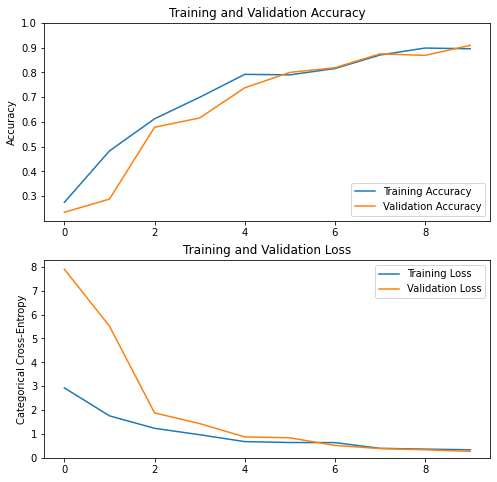

In [24]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Accuracy Graph

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# Loss Graph

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Categorical Cross-Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

Evaluate/Predict/.....

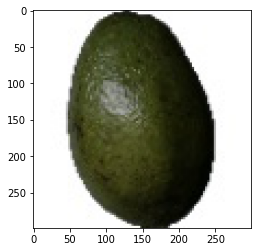

In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#from tensorflow.explain.core.activations import ExtractActivations
from tensorflow.keras.applications.xception import decode_predictions
%matplotlib inline
import requests
from matplotlib.image import imread

#loading and preprocessing fruits
IMAGE_PATH='/content/drive/MyDrive/CNN IMAGES/archive (1)/test/test/0013.jpg'
imread=tf.keras.preprocessing.image.load_img(IMAGE_PATH,target_size=(299,299))
imread=tf.keras.preprocessing.image.img_to_array(imread)

#view the image
plt.imshow(imread/255.)

In [ ]:
from numpy import genfromtxt
import csv
import requests
#fetching labels from Imagenet  
response=requests.get('https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')
imgnet_map=response.json()

#make model predictions
a = np.array([imread])
imread=tf.keras.applications.xception.preprocess_input(imread)
predictions=model.predict(test_generator)
decode_predictions(predictions,top=5)

 98/177 [===============>..............] - ETA: 15:55